## Collatz Engel notebook

In [7]:
"""
This notebook analyses betas of cycles with an experimental formula, based on
the Engel expansion.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from math import log2
import matplotlib.pyplot as plt
import pandas as pd


# Configuration
MAX_N = 10
K_FACTOR = 3
START_VALUE = 33

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Generate data
n = pd.Series(range(1, MAX_N + 1))

analysis_frame = pd.DataFrame({
    "n": n,
    "k": K_FACTOR,
    "v_1": START_VALUE
})

analysis_frame["alpha"] = \
    (analysis_frame["n"] * log2(K_FACTOR)).astype('int64') + 1

analysis_frame["alpha_max"] = analysis_frame["n"] * log2(K_FACTOR) + log2(START_VALUE)
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1

analysis_frame["alpha_1"] = analysis_frame["alpha"] - analysis_frame["n"] + 1

analysis_frame["beta_log_cycle"] = \
    (analysis_frame["n"] * log2(K_FACTOR)).astype('int64') + 1 - \
    analysis_frame["n"] * log2(K_FACTOR)

analysis_frame["beta_cycle"] = 2**analysis_frame["beta_log_cycle"]
analysis_frame["beta_engel"] = \
    (1 + 2**analysis_frame["alpha_1"]) / (K_FACTOR * START_VALUE) - \
    ((2**(analysis_frame["alpha_1"] - 1)) / START_VALUE) * ((2/3)**analysis_frame["n"]) + 1

# Print results
print_frame = analysis_frame[[
    "n", "k","v_1",
    "alpha", "alpha_max", "alpha_1",
    "beta_cycle", "beta_engel"
]]

print_frame.columns = [
    "n", "k","v_1",
    "a", "a_max", "a_1",
    "b_cycle", "b_engel"
]

print("Start value:", START_VALUE, " K:", K_FACTOR,
      "\n")

print(print_frame.to_string(index=False), "\n")

Start value: 33  K: 3 

  n  k  v_1   a  a_max  a_1   b_cycle   b_engel
  1  3   33   2      7    2  1.333333  1.010101
  2  3   33   4      9    3  1.777778  1.037037
  3  3   33   5     10    3  1.185185  1.054994
  4  3   33   7     12    4  1.580247  1.123831
  5  3   33   8     13    4  1.053498  1.139793
  6  3   33  10     15    5  1.404664  1.290768
  7  3   33  12     17    6  1.872885  1.599812
  8  3   33  13     18    6  1.248590  1.618730
  9  3   33  15     20    7  1.664787  2.252582
 10  3   33  16     21    7  1.109858  2.269398 



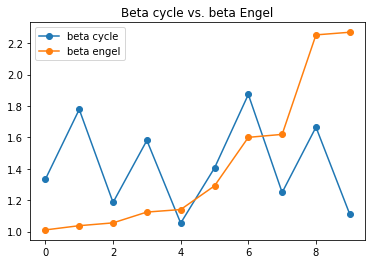

In [8]:
# Plot results
plt.figure()
plt.title("Beta cycle vs. beta Engel")
plt.plot(analysis_frame["beta_cycle"], "-o", label="beta cycle")
plt.plot(analysis_frame["beta_engel"], "-o", label='beta engel')
plt.legend()

plt.show()